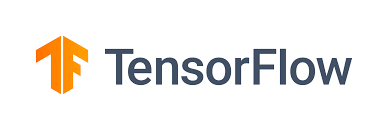

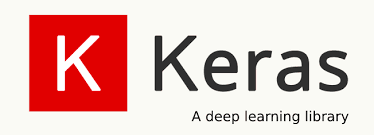

# Oficina

Nessa aula, você aprendeu que o TensorFlow é uma das bibliotecas de código aberto mais versáteis para a construção de Redes Neurais, possuindo um suporte para as diversas arquiteturas de redes. Então, a partir desse conhecimento adquirido, nesta oficina, você praticará a construção de uma rede neural, que vai classificar um conjunto de dígitos escritos à mão, conhecido como mnist. Para que seja possível a realização desses novos aprendizados, é fundamental que você:

- Baixe o arquivo através do link `“Oficina - TensorFlow.ipynb”` e carregue-o no ambiente do Jupyter notebook;
- Siga as seguintes instruções contidas no arquivo e aplique o que você aprendeu, para classificar corretamente o conjunto de dados, usando as bibliotecas TensorFlow e Keras:
 - “Treine uma rede neural com uma camada intermediária de 50 neurônios, utilizando o Keras e o TensorFlow sobre os dados contidos na variável train_images e usando os rótulos train_labels. Após construído o modelo, apresente a acurácia do projeto sobre os dados de teste (test_images, test_labels)”;

- Identifique a acurácia obtida, ao executar o modelo, sobre um conjunto de dados de teste;
- Por fim, exporte o arquivo do notebook e envie-o para a oficina da Aula 5.2 de Machine Learning.

In [25]:
# importando as bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [26]:
# importando o dataset
# este dataset já está embutido na biblioteca "keras"
fashion_mnist = keras.datasets.fashion_mnist

# separando os dados de treino e teste
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
# verificando o tamanho da base de treino - tensor 3D
train_images.shape # 60000 elementos de matrizes de 28 por 28

(60000, 28, 28)

In [28]:
# verificando a quantidade de rótulos de treino
len(train_labels)

60000

In [29]:
# verificando os rótulos da base de treino
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [30]:
# verificando também o tamanho da base de teste - tensor 3D
test_images.shape # 10000 elementos de matrizes de 28 por 28

(10000, 28, 28)

In [31]:
# verificando a quantidade de rótulos na base de teste
len(test_labels)

10000

In [32]:
# verificando os rótulos de teste
# por questão de limitação de espaço (total de 10.000)
# é somente exibido os três primeiros e três últimos rótulos de teste
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
# as imagens de treino e teste é composta por matriz de 28 por 28
# e cada um desses elementos da matriz é exatamente um pixel entre 0 e 255
# sendo 0 ausência de cor e 255 máxima intensidade de cor
# e alguns modelos, tais como a regressão linear e as próprias redes neurais, eles se beneficiam de atributos escalados
# eles utilizam uma técnica de gradiente para otimização - uma derivada

# transformando nossa imagem em escala pequena
# como nossa imagem tem entre 0 e 255 pixels
# então podemos dividir a matriz 
# portanto o pixel com maior intensidade de 255 será igual 1
# de menor intensidade que é 0 continuará sendo 0
# e os de intensidade intermediária estará entre 0 e 1
# dessa forma, implicitamente estamos utilizando o "MinMaxScaller" sem chamá-lo

train_images = train_images / 255.0 # imagens de treino

test_images = test_images / 255.0 # imagens de teste

In [34]:
# instanciando o modelo e sua arquitetura
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(50, activation=tf.nn.relu), # camada intermediária de 50 neurônios
                          keras.layers.Dense(10, activation=tf.nn.softmax) # camada de saída de 10 neurônios
                          # a última camada é exatemente a quantidade de classes presente no conjunto de dados
])

# dados sumarizados do modelo
# mostra quantos pesos tem a rede neural e a estrutura do mesmo e suas camadas
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [35]:
# compilando o modelo com a função "compile"
model.compile(optimizer='adam', # otimizador para os pesos de treinamento
              loss='sparse_categorical_crossentropy', # métrica de erro -entropia cruzada categórica esparsa
              metrics=['accuracy']) # porcentagem de elementos classificados corretamente sobre o total

In [36]:
# aplicando o treinamento do modelo e avaliando sua acurácia por épocas
model.fit(train_images, train_labels, epochs=5) # 5 épocas de treinamento - iterações

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7022 - accuracy: 0.7563
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4149 - accuracy: 0.8546
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3738 - accuracy: 0.8655
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3502 - accuracy: 0.8753
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3266 - accuracy: 0.8826


In [53]:
# avaliando ganho de acurácia - início e fim
epoch_1 = 0.7563
epoch_5 = 0.8826

total = (epoch_5 / epoch_1) - 1
total 

0.16699722332407796

**Perceba que, da época 1 para 5, houve um ganho de aproximadamente de 17% de acurácia**

In [54]:
# avaliando acurácia sobre os dados de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)

# imprimindo acurácia do teste
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 906us/step - loss: 0.3720 - accuracy: 0.8681
Test accuracy: 0.8680999875068665


In [55]:
# criando uma variável para avaliar a predição para cada uma das imagens de teste 
predictions = model.predict(test_images)

In [56]:
# imprimindo a primeira predição
predictions[0] # um array de 10 elementos com notações científicas
# onde a classificação será dada com a maior valor das predições

array([5.1439947e-05, 6.6628473e-08, 1.6260406e-05, 5.1671004e-06,
       2.0649744e-05, 2.7065206e-02, 9.9685945e-05, 7.3109046e-02,
       1.1877426e-03, 8.9844465e-01], dtype=float32)

In [57]:
# verificando o índice máximo
np.argmax(predictions[0]) # temos a classe "9"

9

In [58]:
# avaliando a assertividade do modelo
test_labels[0]
# para a primeira imagem o modelo acertou

9

In [59]:
# realizando uma avaliação separada - individual de cada uma das imagens
img = test_images[0] # instanciando a imagem de teste [0] na variável "img"

# imprimindo o shape da imagem - 28 x 28 
print(img.shape)

(28, 28)


In [60]:
# o modelo espera um vetor de imagem que seja passado e, aqui só temos uma imagem sozinha
# iremos utlizar o numpy para expandir a dimensão dessa imagem para ter um vetor 
img = (np.expand_dims(img,0)) # a função "expand_dims" irar expandir a dimensão da imagem colocando dentro de um novo vetor

# imprimindo o shape do vetor
print(img.shape)

(1, 28, 28)


In [61]:
# aplicando essa nova imagem de vetor ao modelo
predictions_single = model.predict(img) # instanciando a predição da única imagem na variável "predictions_single"

# imprimindo a variável "predictions_single" com o valor das predições
print(predictions_single)

[[5.1439849e-05 6.6628346e-08 1.6260377e-05 5.1670954e-06 2.0649724e-05
  2.7065217e-02 9.9685851e-05 7.3109061e-02 1.1877432e-03 8.9844465e-01]]


In [62]:
# efetuando a predição
# retornará o rótulo da primeira imagem
np.argmax(predictions_single[0])

9